# TASK 2: User Engagement analysis

The aim of this notebook is to analyze the engagement of the users. By doing this will see how engage the user are towards the services of the TellCo company.
This will result in building & improving the Quality of Service (QoS) to leverage the mobile platforms and to get more users for the business.</br>
For this task, we are called to to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))

In [1]:
# Importation of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../scripts')
from Extract_data import extract_data

In [3]:
# Import the dataset
df = pd.read_csv("../data/Cleaned_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (s)                                  150001 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Let's extract the important variables to perform this task. The imported dataset has already been cleaned and the cleaning process can be found in the notebook [here](Data_Preprocessing.ipynb).

In [4]:
# Extract the important variables for the task 2
dfTask2 = df.loc[:,['Bearer Id','Dur. (s)','MSISDN/Number','Social Media DL (Bytes)','Social Media UL (Bytes)',
                                  'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                                  'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                  'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
                                  'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
                                  'Total UL (Bytes)', 'Total DL (Bytes)']]
dfTask2[['MSISDN/Number','Bearer Id']] = dfTask2[['MSISDN/Number','Bearer Id']].astype(str).replace('nan',np.nan)
dfTask2.head(5)

,Bearer Id,Dur. (s),MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.31144834608449e+19,86399.0,33664962239.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.31144834828789e+19,86399.0,33681854413.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.31144834840805e+19,86399.0,33760627129.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.31144834854428e+19,86399.0,33750343200.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.31144834994807e+19,86399.0,33699795932.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [6]:
# Check for missing values
missing_values_table(dfTask2)
#dfTask2.isna().sum().sort_values(ascending=False)

Your selected dataframe has 19 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,object
Bearer Id,991,0.7,object


The aim here is to track the user engagement to be able to build the QoS. Since MSISDN and Bearer Id are unique identifier it's not recommendable to impute them withe the mode. We want to perform clustering, the values related to the mode of MSISDN will be modified and this will lead to a wrong grouping. </br>

As the missing values represent only $0.7\%$, we can remove the observations that have NA for MSISDN.
Since we now the MSISDN, we can easily get the remaining information related to the given user.

In [7]:
dfTask2.dropna(subset=['MSISDN/Number'],inplace=True)
missing_values_table(dfTask2)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Bearer Id,429,0.3,object


>## Task 2.1

### Aggregate the metrics per customer id (MSISDN)
To do so, we'll use a module we wrote in the script [Extract_data.py](..\scripts\Extract_data.py)

In [8]:
dfForAgg = extract_data(dfTask2)
dfAgg = dfForAgg.merge_data('MSISDN/Number')
dfAgg.drop(columns= ['Total UL (Bytes)','Total DL (Bytes)'],inplace=True)

In [9]:
# Function to convert seconds into hours
def convert_sec_to_day(df,duration_col):
    """This function converts the duration (s) into days"""
    day = 3600*24
    df.loc[:,duration_col] = df.loc[:,duration_col]/day
    return df.loc[:,duration_col]

# Function to convert into Mbytes
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df.loc[:,bytes_data] = df.loc[:,bytes_data] / megabyte
    return df.loc[:,bytes_data]

In [10]:
dfAggDay = dfAgg.copy()
dfAggDay['Dur. (s)'] = convert_sec_to_day(dfAggDay,'Dur. (s)')
dfAggDay.rename(columns={'Dur. (s)':'Duration (day)'},inplace=True)
dfAggDayMb = dfAggDay.copy()
dfAggDayMb[['Social Media','Google','Email','Youtube','Gaming','Other','Total']] = convert_bytes_to_megabytes(dfAggDay,['Social Media','Google','Email','Youtube','Gaming','Other','Total'])
dfAggDayMb

,Number of session,Duration (day),Social Media,Google,Email,Youtube,Gaming,Other,Total
MSISDN/Number,,,,,,,,,
3197020876596.0,1,0.999988,0.715224,10.438660,1.520771,11.959905,178.048738,470.526473,232.123971
33601001722.0,1,1.350926,2.232135,4.389005,1.331362,21.624548,812.458661,386.570872,878.690574
33601001754.0,1,2.097569,2.660565,5.334863,3.307781,12.432223,119.750078,281.710071,156.859643
33601002511.0,1,1.562141,3.195623,3.443126,3.205380,21.333570,538.827713,501.693672,595.966483
33601007832.0,1,0.577292,0.280294,9.678493,2.284670,6.977321,391.126127,35.279702,422.320698
...,...,...,...,...,...,...,...,...,...
33789967113.0,1,1.857187,1.413370,9.892882,3.396607,28.226479,134.815919,408.107210,208.123067
33789980299.0,2,2.435058,4.250312,10.246473,5.315327,38.012812,972.344996,1075.140407,1094.693386
33789996170.0,1,0.101968,0.300183,7.531269,1.006915,26.647843,660.361359,295.282817,714.641641


In [11]:
# Extract the data for KMeans
dfKmeans = dfAggDayMb.loc[:,['Number of session','Duration (day)','Total']]

# Normalize the data
from sklearn.preprocessing import Normalizer, MinMaxScaler
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

dfKmeansNorm = normalizer(dfKmeans,['Number of session','Duration (day)','Total'])

In [12]:
# Perform clustering
from sklearn.cluster import KMeans

# KMean model
km = KMeans(n_clusters=3)
km.fit(dfKmeansNorm)

# Predict the cluster
clust = km.predict(dfKmeansNorm)

dfKmeansFV = dfKmeans.copy()
dfKmeansFV['Cluster'] = clust
dfKmeansFV

,Number of session,Duration (day),Total,Cluster
MSISDN/Number,,,,
3197020876596.0,1,0.999988,232.123971,2
33601001722.0,1,1.350926,878.690574,0
33601001754.0,1,2.097569,156.859643,1
33601002511.0,1,1.562141,595.966483,0
33601007832.0,1,0.577292,422.320698,0
...,...,...,...,...
33789967113.0,1,1.857187,208.123067,2
33789980299.0,2,2.435058,1094.693386,0
33789996170.0,1,0.101968,714.641641,0


In [13]:
dfKmeansFV.groupby('Cluster').describe().T

Cluster                             0            1             2
Number of session count  85006.000000  3908.000000  17942.000000
                  mean       1.444498     1.038383      1.207056
                  std        0.864584     0.199976      0.530534
                  min        0.000000     1.000000      0.000000
                  25%        1.000000     1.000000      1.000000
                  50%        1.000000     1.000000      1.000000
                  75%        2.000000     1.000000      1.000000
                  max       18.000000     3.000000      9.000000
Duration (day)    count  85006.000000  3908.000000  17942.000000
                  mean       1.461164     1.654224      1.575827
                  std        1.218869     0.625601      1.031109
                  min        0.082662     0.159201      0.084410
                  25%        0.703597     1.088215      0.999988
                  50%        1.066001     1.615122      1.335220
                  75%        1.945055     1.996620      1.998284
                  max       22.054144     5.952731     11.757894
Total             count  85006.000000  3908.000000  17942.000000
                  mean     805.657486   112.921390    273.446525
                  std      480.379874    42.341526    181.493706
                  min       52.944613    33.249009     52.870808
                  25%      505.958465    84.974418    161.982934
                  50%      712.060642   102.675577    227.168438
                  75%      902.946351   131.838566    319.256891
                  max     8846.226494   460.938068   2690.138875

In [14]:
dfKmeansFV.groupby('Cluster').sum()

,Number of session,Duration (day),Total
Cluster,,,
0,122791,124207.694340,6.848572e+07
1,4058,6464.708032,4.412968e+05
2,21657,28273.479317,4.906178e+06


In [15]:
# Function to create scatter plot
def plot_scatter(df,xcol:str,ycol:str,setLoop,ax,forLoop=False,hue=None):
    if forLoop==True:
        pos = setLoop.index(xcol)
        sns.scatterplot(data=df,x=xcol,y=ycol,ax=axs[pos])
        axs[pos].set_title(f'{xcol} VS {ycol}')
    else:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df,x=xcol,y=ycol)
        plt.title(f'{xcol} VS {ycol}')
        plt.show()

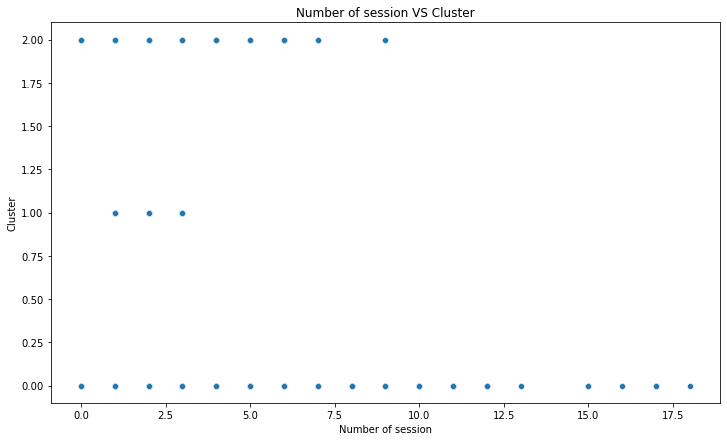

In [16]:
plot_scatter(dfKmeansFV,xcol='Number of session',ycol='Cluster',setLoop=None,ax=None)

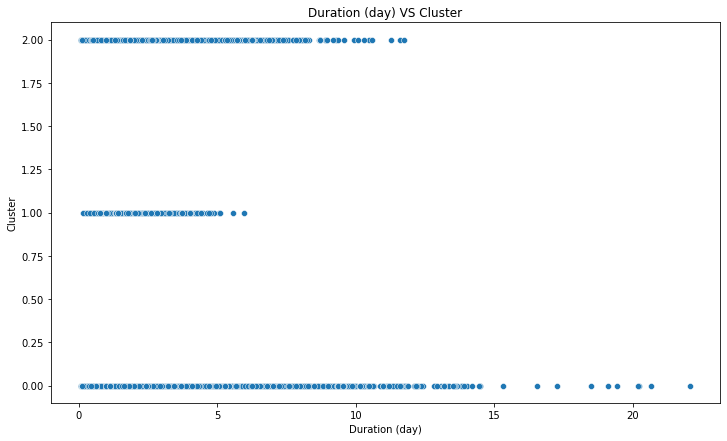

In [17]:
plot_scatter(dfKmeansFV,xcol='Duration (day)',ycol='Cluster',setLoop=None,ax=None)

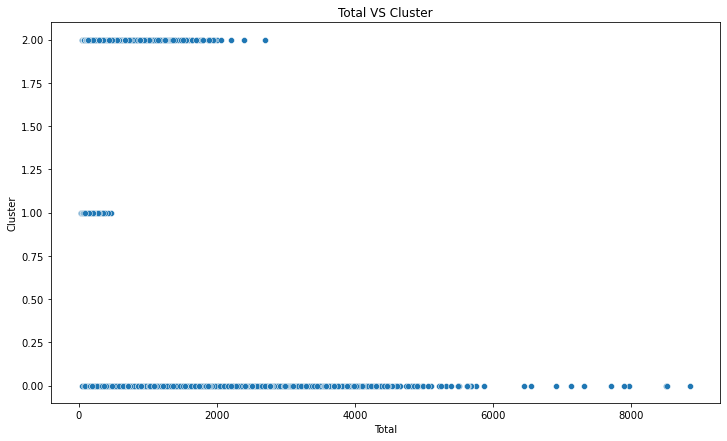

In [18]:
plot_scatter(dfKmeansFV,xcol='Total',ycol='Cluster',setLoop=None,ax=None)

Looking at those statistics, the most engaged user ar those in the Cluster 0, after who, we find those of Cluster 2 and those of Cluster 1.

In [19]:
def find_top(df,column:str,topn:int):
    return df[column].sort_values(ascending=False)[:topn]

In [20]:
application = ['Social Media','Google', 'Email','Youtube','Gaming','Other']
for app in application:
    print(f"Top of {app}\n=========")
    print(find_top(dfAggDayMb,app,10))
    print("\n\n")

Top of Social Media
MSISDN/Number
33626320676.0    43.374779
33760536639.0    39.783189
33659725664.0    35.412358
33614892860.0    28.294544
33625779332.0    27.135500
33667163239.0    24.247850
33786323068.0    23.974919
33669068942.0    23.800834
33603127838.0    23.077825
33658490784.0    23.000066
Name: Social Media, dtype: float64



Top of Google
MSISDN/Number
33626320676.0    152.191852
33625779332.0    142.307915
33614892860.0    127.973787
33760536639.0    123.223099
33659725664.0    116.516345
33786323068.0    110.254484
33675877202.0    109.860502
33667163239.0    105.032696
33761268199.0     97.089988
33698756430.0     91.935151
Name: Google, dtype: float64



Top of Email
MSISDN/Number
33626320676.0    42.418782
33614892860.0    40.788634
33625779332.0    40.633966
33786323068.0    36.310123
33659725664.0    35.999792
33760536639.0    33.693767
33675877202.0    31.514421
33665460546.0    30.417885
33667163239.0    30.335796
33698792269.0    29.059042
Name: Email, dtype: f

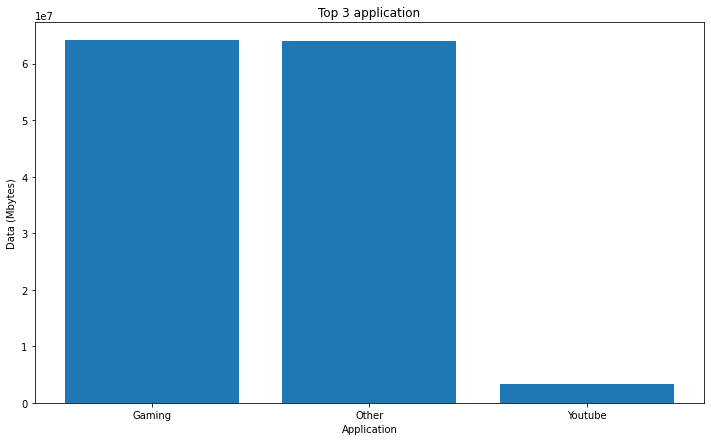

In [21]:
# Search for the top 3 most used application
dfApp = dfAggDayMb[application].sum().sort_values(ascending=False)
plt.figure(figsize=(12,7))
plt.bar(dfApp[:3].index,dfApp[:3].values)
plt.xlabel('Application');plt.ylabel('Data (Mbytes)')
plt.title('Top 3 application')
plt.show()

### Elbow method to find the optimized value of k

In [22]:
# Extract the data for KMeans
dfKmeans = dfAggDayMb.loc[:,['Number of session','Duration (day)','Total']]

dfKmeansNorm = normalizer(dfKmeans,['Number of session','Duration (day)','Total'])

In [23]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfKmeansNorm)
    distortions.append(kmeanModel.inertia_)

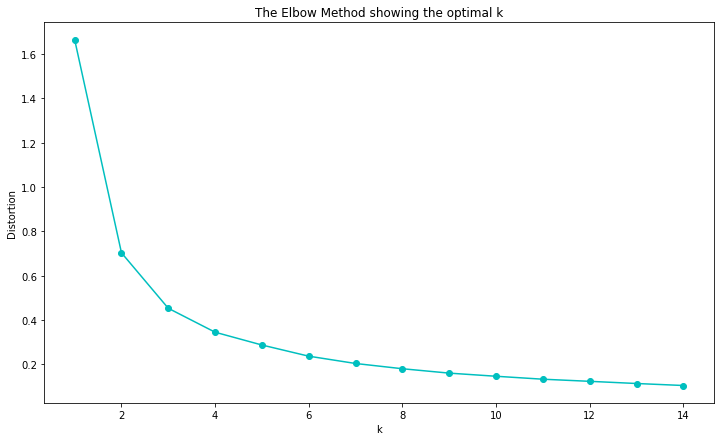

In [24]:
plt.figure(figsize=(12,7))
plt.plot(K, distortions, '-oc')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using the Elbow method, the optimized number of clusters is *3*